In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.ensemble as ske
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from stroopwafel import constants , utils
from sklearn import metrics , tree
import seaborn as sns
%matplotlib notebook

# import the dataset created with stroppwafel_interface

dataset = pd.read_csv('./samples.csv')
#dataset = dataset.sample(frac=1).reset_index(drop=True)

<hr> 

# Checking distribution

<p> First thing we check if the number of point it is like it was define </p>

<IPython.core.display.Javascript object>


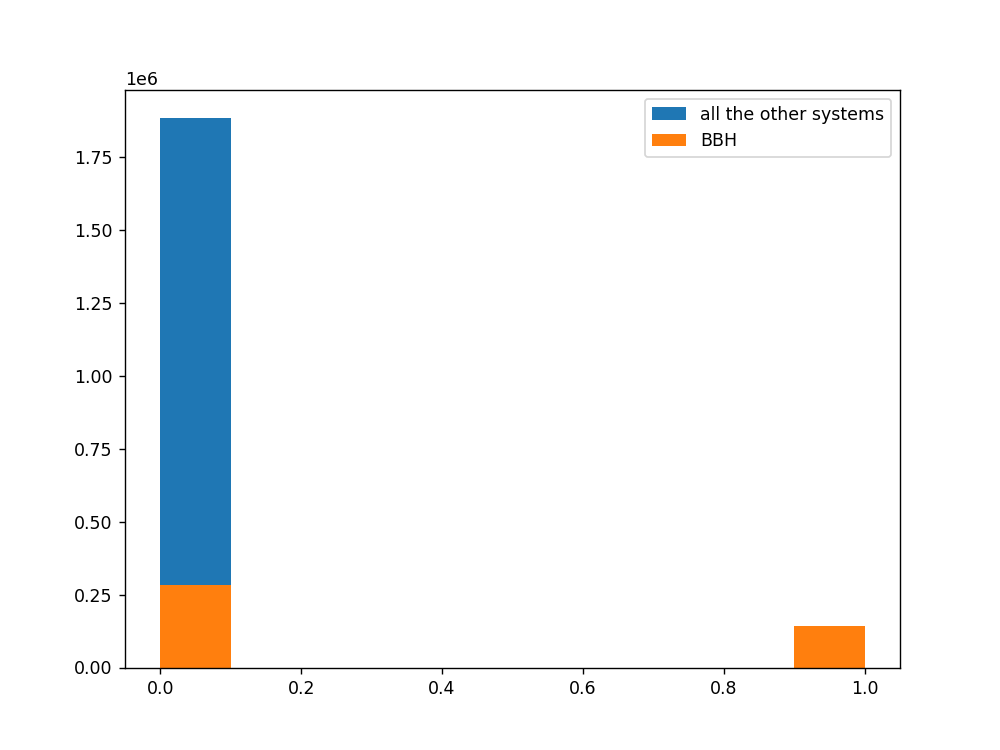

2028000


In [2]:
df=dataset
plt.figure(figsize=[8,6])
plt.hist( df.is_hit , label = 'all the other systems')
print (len(df))
plt.hist( df[df.bbh==1]['is_hit'] , label = 'BBH')
plt.legend()

## Initial mass 1 distribution

<p> We check if the final distribution reflect in some way the initial one, it can be seen in the plot that all the systems that are not a BBH follow a more uniform distributions, that is due to the sampling of stroopwafel that basically stop to sample systems that are not BBH after the exploratory phase.
</p>

<IPython.core.display.Javascript object>


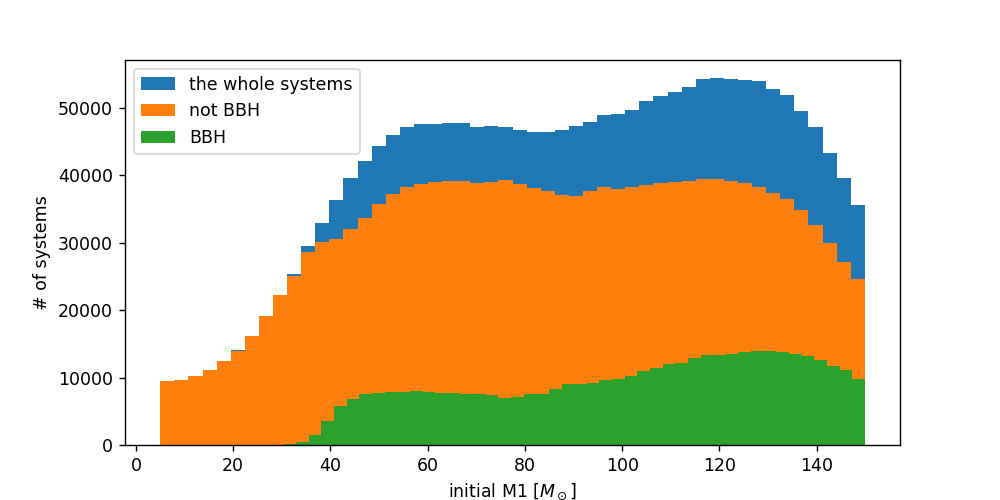

In [4]:
plt.figure(figsize=[8,4])
plt.hist(df['--initial-mass-1'],50, label='the whole systems')
plt.hist(df[df.bbh==0]['--initial-mass-1'], 50, label='not BBH')
plt.hist(df[df.bbh==1]['--initial-mass-1'], 50, label='BBH' )
plt.xlabel(r'initial M1 [$M_\odot$]')
plt.legend()
plt.ylabel('# of systems')
plt.legend()
plt.savefig('mass_1')

## Distribution of mass ratio 

<IPython.core.display.Javascript object>


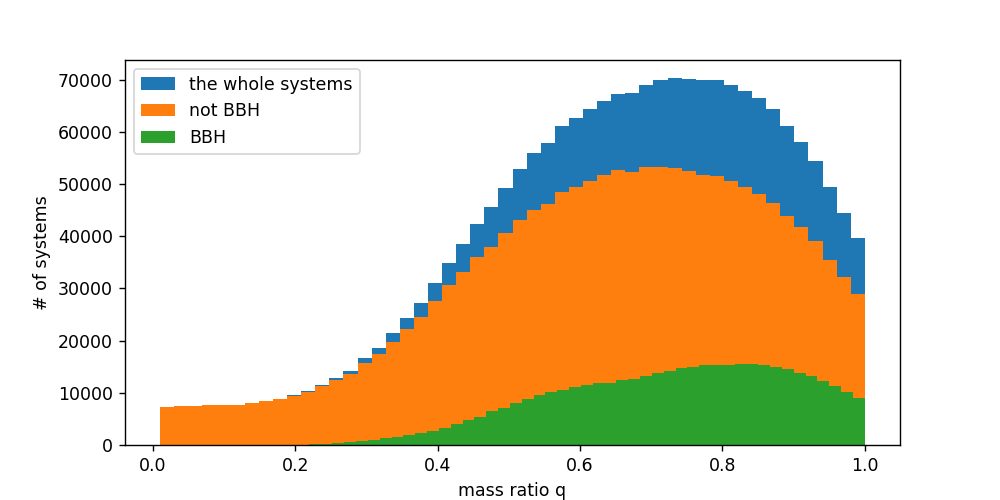

In [5]:
plt.figure(figsize=[8,4])
plt.hist(df['q'],50,label='the whole systems')
plt.hist(df[df.bbh==0]['q'],50, label='not BBH')
plt.hist(df[df.bbh==1]['q'],50, label='BBH')
plt.xlabel('mass ratio q')
plt.ylabel('# of systems')
plt.legend()
plt.savefig('mass_ratio')

## q - M1 correlation

<IPython.core.display.Javascript object>


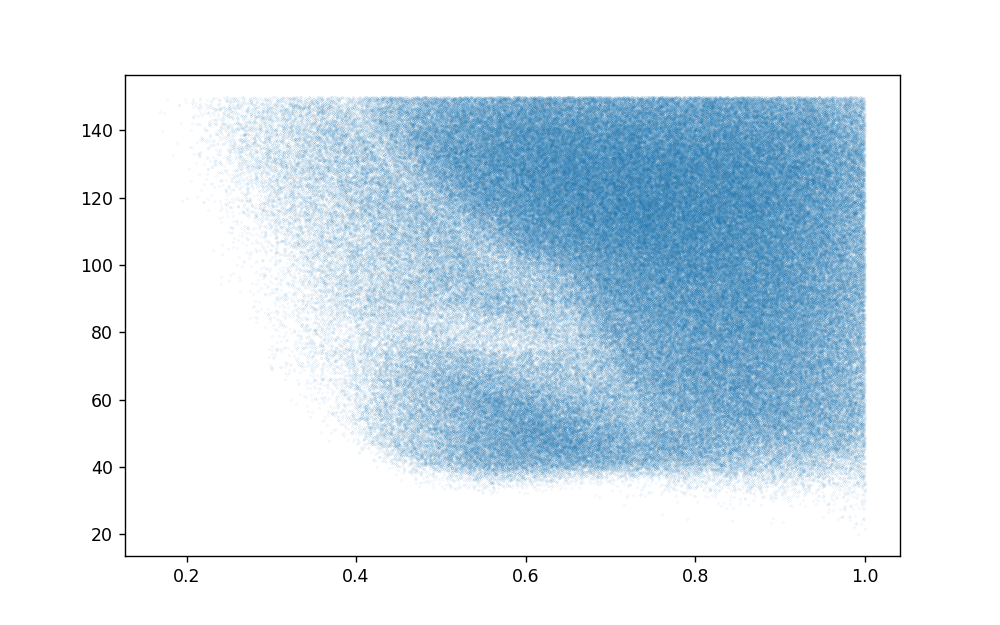

In [11]:
plt.figure(figsize=[8,5])
plt.plot(df[df.bbh==1]['q'] , df[df.bbh==1]['--initial-mass-1'],'.', markersize=0.08)

## Mass 1 - semi major axis

<IPython.core.display.Javascript object>


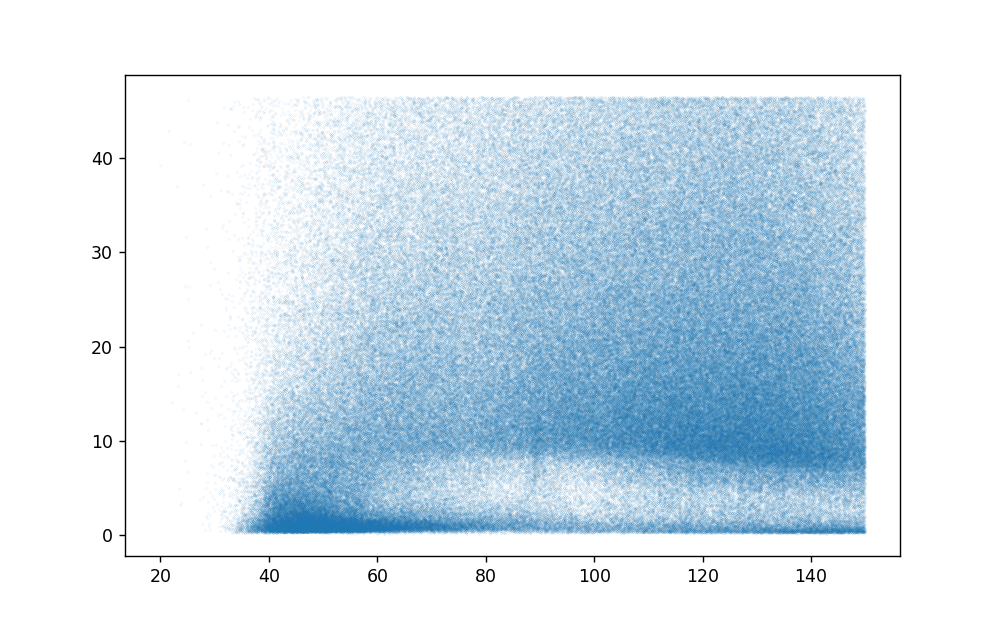

In [13]:
plt.figure(figsize=[8,5])
plt.plot(df[df.bbh==1]['--initial-mass-1'] , df[df.bbh==1]['--semi-major-axis'],'.', markersize=0.08)

## Uniform distribution of hit 

<p> We are verifing that the BBHs that merge and the ones that don't are uniformly distributed over the whole dataset </p>

<IPython.core.display.Javascript object>


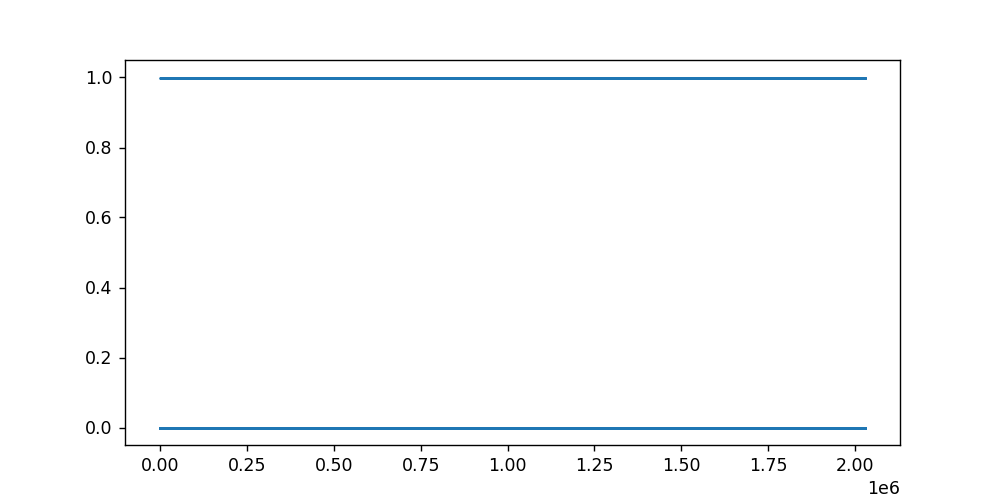

In [15]:
# controllo che non siano distribuiti in maniera brutta, tipo prima tutti 0 e poi tutti 1
plt.figure(figsize=[8,4])
plt.plot(df.is_hit,'.', markersize=0.1)#(df[df.bbh==1]['is_hit'],'.')

In [32]:
df.head()

,--eccentricity,--initial-mass-1,--metallicity,--semi-major-axis,q,--initial-mass-2,SEED,batch,bbh,final_mass_1,final_mass_2,is_hit,time_common_enveloe_1,time_common_enveloe_2
0,0.633159,32.821114,0.008210,16.044795,0.054493,1.788524,0,0,0,0.00000,0.00000,0,5.946514,0.0
1,0.557586,42.147774,0.012929,5.629675,0.310293,13.078149,1,0,0,0.00000,0.00000,0,0.000000,0.0
2,0.289601,79.487133,0.003978,15.569079,0.755366,60.041858,2,0,1,23.15516,18.42367,0,0.000000,0.0
3,0.539525,82.654363,0.002842,0.761075,0.033168,2.741515,3,0,0,0.00000,0.00000,0,3.689890,0.0
4,0.622294,67.199150,0.005280,0.277868,0.028083,1.887123,4,0,0,0.00000,0.00000,0,2.374220,0.0


<IPython.core.display.Javascript object>


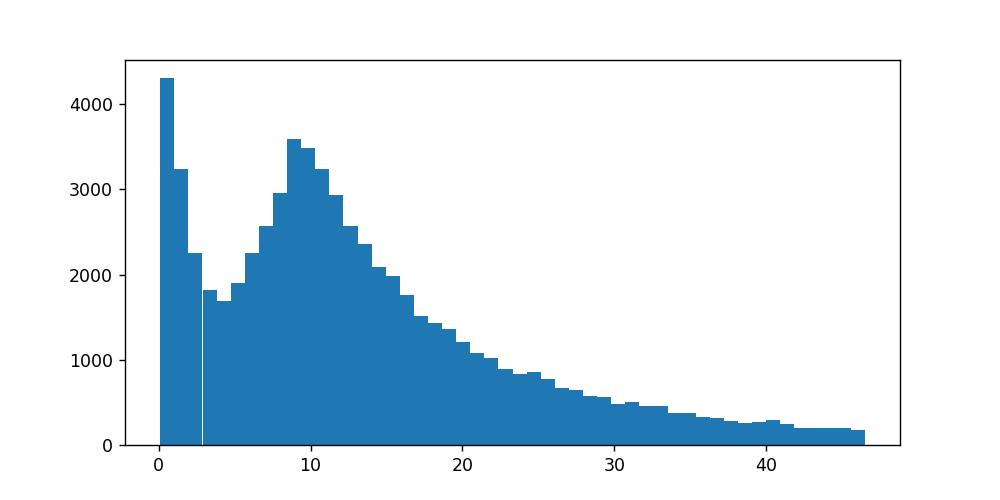

2307


(array([4304., 3241., 2258., 1825., 1686., 1897., 2256., 2576., 2960.,
        3596., 3491., 3236., 2933., 2574., 2361., 2088., 1987., 1757.,
        1512., 1430., 1362., 1206., 1081., 1027.,  892.,  834.,  857.,
         778.,  666.,  640.,  570.,  567.,  485.,  507.,  460.,  452.,
         373.,  373.,  327.,  312.,  277.,  261.,  267.,  288.,  249.,
         198.,  199.,  195.,  195.,  173.]),
 array([ 0.10075781,  1.02876872,  1.95677964,  2.88479055,  3.81280147,
         4.74081238,  5.6688233 ,  6.59683421,  7.52484513,  8.45285604,
         9.38086696, 10.30887787, 11.23688879, 12.1648997 , 13.09291062,
        14.02092154, 14.94893245, 15.87694337, 16.80495428, 17.7329652 ,
        18.66097611, 19.58898703, 20.51699794, 21.44500886, 22.37301977,
        23.30103069, 24.2290416 , 25.15705252, 26.08506343, 27.01307435,
        27.94108526, 28.86909618, 29.7971071 , 30.72511801, 31.65312893,
        32.58113984, 33.50915076, 34.43716167, 35.36517259, 36.2931835 ,
        37.22119

In [19]:
plt.figure(figsize=[8,4])
df_bbh = dataset[dataset.is_hit==1]
print (len(df_bbh.loc[0:int(0.13*1e6)]['--semi-major-axis']))
#plt.plot(df_bbh['--initial-mass-1'],df_bbh.q,'.')
plt.hist(df_bbh.loc[0:int(1*1e6)]['--semi-major-axis'],50)

<IPython.core.display.Javascript object>


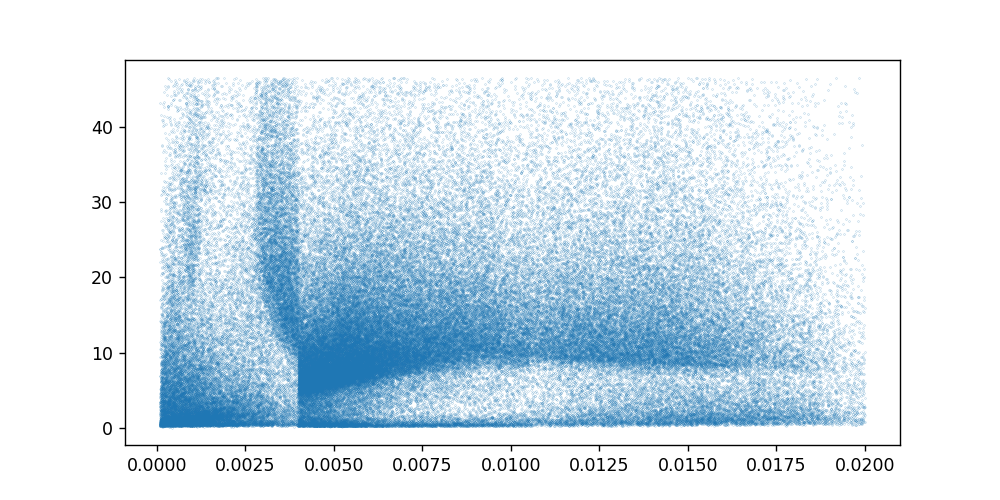

In [20]:
plt.figure(figsize=[8,4])
df_bbh = dataset[dataset.is_hit==1]
#plt.plot(df_bbh['--initial-mass-1'],df_bbh.q,'.')
plt.plot(df_bbh['--metallicity'], df_bbh['--semi-major-axis'],'.', markersize=0.2)

<IPython.core.display.Javascript object>


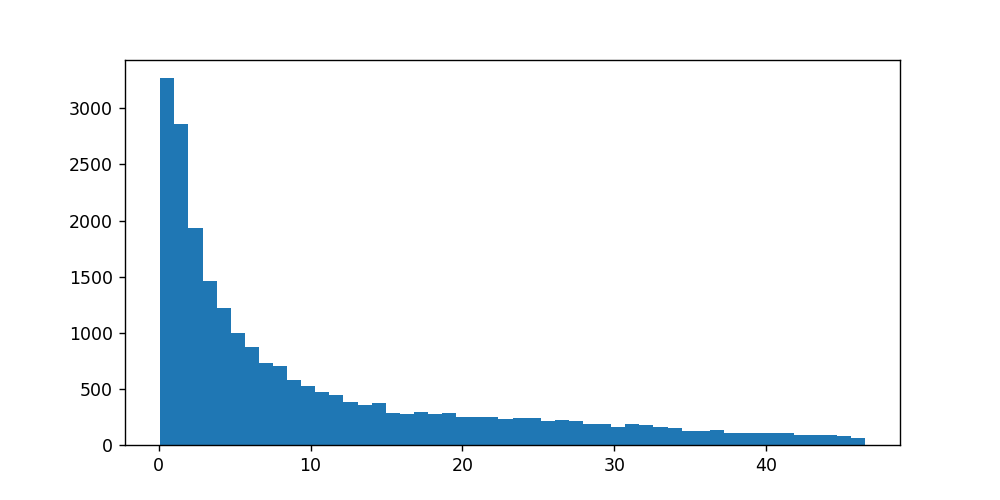

(array([3267., 2860., 1935., 1460., 1220., 1002.,  875.,  732.,  701.,
         583.,  522.,  475.,  447.,  380.,  355.,  372.,  284.,  273.,
         290.,  272.,  284.,  249.,  248.,  252.,  230.,  240.,  241.,
         213.,  220.,  215.,  184.,  184.,  157.,  183.,  182.,  162.,
         151.,  127.,  126.,  137.,  103.,  109.,  103.,  103.,  110.,
          89.,   85.,   91.,   77.,   65.]),
 array([ 0.10075781,  1.02864788,  1.95653795,  2.88442803,  3.8123181 ,
         4.74020817,  5.66809825,  6.59598832,  7.52387839,  8.45176847,
         9.37965854, 10.30754861, 11.23543869, 12.16332876, 13.09121883,
        14.01910891, 14.94699898, 15.87488905, 16.80277913, 17.7306692 ,
        18.65855927, 19.58644935, 20.51433942, 21.44222949, 22.37011957,
        23.29800964, 24.22589971, 25.15378979, 26.08167986, 27.00956993,
        27.93746001, 28.86535008, 29.79324016, 30.72113023, 31.6490203 ,
        32.57691038, 33.50480045, 34.43269052, 35.3605806 , 36.28847067,
        37.21636

In [37]:
plt.figure(figsize=[8,4])
plt.hist(df_bbh[df_bbh['--metallicity']<0.003]['--semi-major-axis'],50)
#plt.hist(df_bbh[df_bbh['--metallicity']<0.003]['--initial-mass-2'],50)

<IPython.core.display.Javascript object>


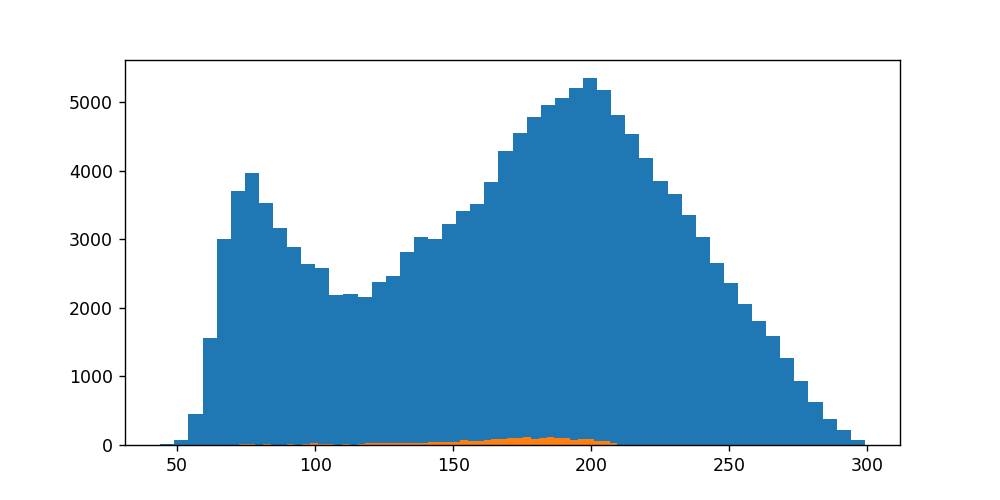

(array([  2.,   6.,  11.,  16.,   6.,  10.,   7.,   5.,  14.,   7.,  13.,
         26.,  16.,   9.,   2.,   8.,   4.,   9.,  24.,  22.,  29.,  24.,
         33.,  32.,  31.,  36.,  45.,  42.,  51.,  42.,  67.,  56.,  55.,
         75.,  82.,  86.,  98., 107., 117.,  90.,  99., 112., 107.,  97.,
         74.,  90.,  89.,  63.,  55.,  25.]),
 array([ 66.76801675,  69.62229063,  72.4765645 ,  75.33083838,
         78.18511225,  81.03938613,  83.89366   ,  86.74793387,
         89.60220775,  92.45648162,  95.3107555 ,  98.16502937,
        101.01930325, 103.87357712, 106.727851  , 109.58212487,
        112.43639874, 115.29067262, 118.14494649, 120.99922037,
        123.85349424, 126.70776812, 129.56204199, 132.41631586,
        135.27058974, 138.12486361, 140.97913749, 143.83341136,
        146.68768524, 149.54195911, 152.39623299, 155.25050686,
        158.10478073, 160.95905461, 163.81332848, 166.66760236,
        169.52187623, 172.37615011, 175.23042398, 178.08469786,
        180.938971

In [39]:
plt.figure(figsize=[8,4])
plt.hist(df_bbh['--initial-mass-1']+df_bbh['--initial-mass-2'],50)
plt.hist(df_bbh[df_bbh['q']<0.4]['--initial-mass-2']+df_bbh[df_bbh['q']<0.4]['--initial-mass-1'],50)

<IPython.core.display.Javascript object>


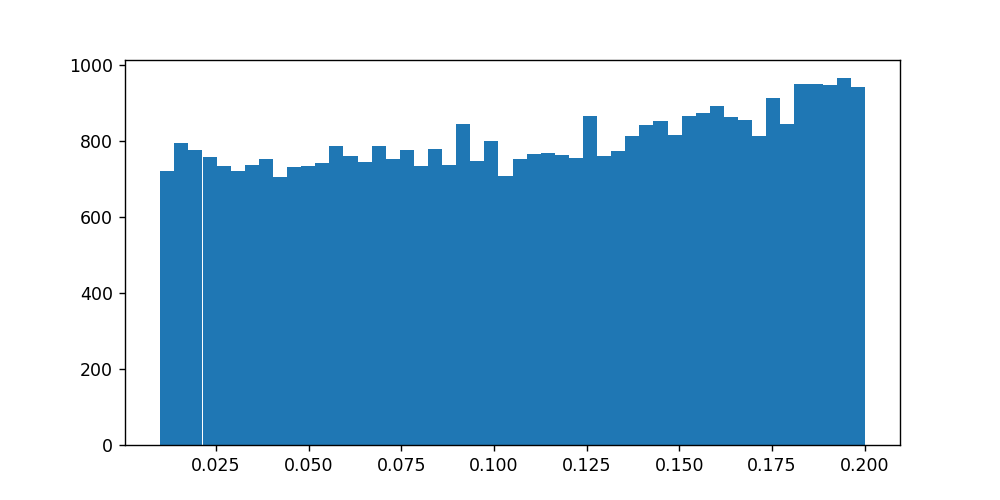

(array([723., 796., 776., 760., 735., 721., 737., 754., 707., 733., 735.,
        742., 789., 762., 746., 788., 754., 778., 735., 781., 738., 845.,
        749., 801., 708., 754., 767., 769., 763., 755., 867., 762., 775.,
        814., 844., 854., 818., 866., 874., 894., 863., 855., 815., 915.,
        845., 952., 952., 949., 966., 943.]),
 array([0.01000285, 0.01380275, 0.01760265, 0.02140255, 0.02520245,
        0.02900235, 0.03280225, 0.03660215, 0.04040205, 0.04420195,
        0.04800185, 0.05180175, 0.05560165, 0.05940155, 0.06320145,
        0.06700135, 0.07080125, 0.07460115, 0.07840105, 0.08220095,
        0.08600085, 0.08980075, 0.09360065, 0.09740054, 0.10120044,
        0.10500034, 0.10880024, 0.11260014, 0.11640004, 0.12019994,
        0.12399984, 0.12779974, 0.13159964, 0.13539954, 0.13919944,
        0.14299934, 0.14679924, 0.15059914, 0.15439904, 0.15819894,
        0.16199884, 0.16579874, 0.16959864, 0.17339854, 0.17719844,
        0.18099834, 0.18479824, 0.18859814, 0.

In [52]:
plt.figure(figsize=[8,4])
plt.hist(df.q[df.q<0.2],50)

130000
130000
14441


<IPython.core.display.Javascript object>


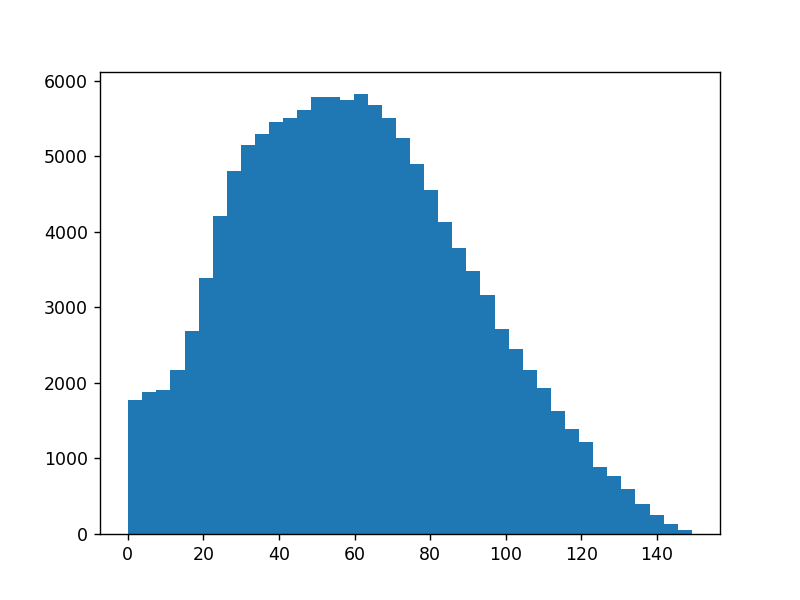

(array([1768., 1884., 1910., 2165., 2685., 3390., 4208., 4805., 5151.,
        5292., 5451., 5513., 5607., 5785., 5779., 5750., 5825., 5682.,
        5513., 5246., 4896., 4549., 4131., 3783., 3477., 3158., 2714.,
        2446., 2171., 1930., 1632., 1386., 1223.,  885.,  763.,  599.,
         399.,  257.,  137.,   55.]),
 array([1.00802960e-01, 3.82836974e+00, 7.55593651e+00, 1.12835033e+01,
        1.50110701e+01, 1.87386368e+01, 2.24662036e+01, 2.61937704e+01,
        2.99213372e+01, 3.36489039e+01, 3.73764707e+01, 4.11040375e+01,
        4.48316043e+01, 4.85591711e+01, 5.22867378e+01, 5.60143046e+01,
        5.97418714e+01, 6.34694382e+01, 6.71970049e+01, 7.09245717e+01,
        7.46521385e+01, 7.83797053e+01, 8.21072720e+01, 8.58348388e+01,
        8.95624056e+01, 9.32899724e+01, 9.70175391e+01, 1.00745106e+02,
        1.04472673e+02, 1.08200239e+02, 1.11927806e+02, 1.15655373e+02,
        1.19382940e+02, 1.23110507e+02, 1.26838073e+02, 1.30565640e+02,
        1.34293207e+02, 1.3802

In [32]:
n = int(0.13*1e6)
print (n)
dfn = df.iloc[0:n]
print (len(dfn))
print (len(dfn[dfn['is_hit']==1]))
dfn_bbh = dfn[dfn['is_hit']==1]
plt.figure()
plt.hist(dfn['--initial-mass-2'],40)